In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 7.888609052210118e-31


In [7]:
insurance = pd.read_csv("./insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
correlation = insurance.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


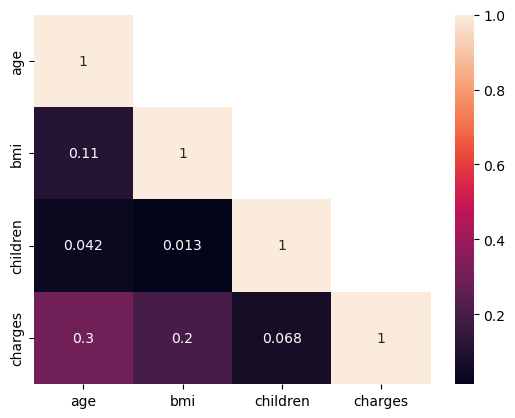

In [12]:
mask = np.triu(np.ones_like(correlation), k=1)
sns.heatmap(correlation, annot=True, mask=mask)
plt.show()

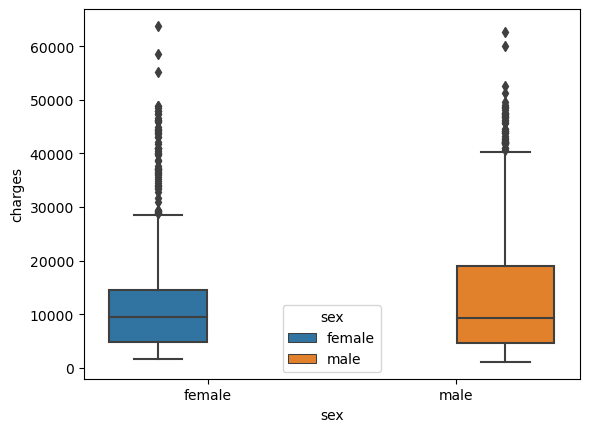

In [13]:
sns.boxplot(x="sex", y="charges", data=insurance, hue="sex")
plt.show()

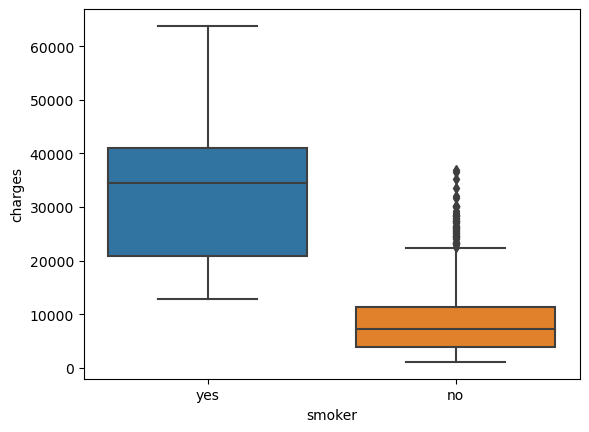

In [14]:
sns.boxplot(x="smoker", y="charges", data=insurance)
plt.show()

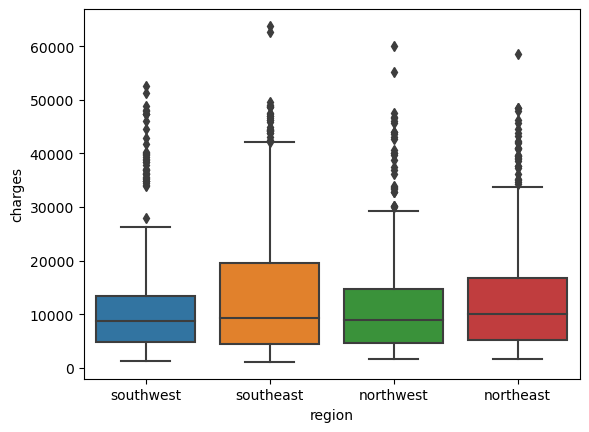

In [15]:
sns.boxplot(x="region", y="charges", data=insurance)
plt.show()

In [18]:
insurance_final = insurance[["age", "bmi", "smoker", "charges"]].copy()
insurance_final

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


In [19]:
encoder = OneHotEncoder(sparse=False, drop="first")
smoker_encoded = encoder.fit_transform(insurance_final["smoker"].values.reshape(-1,1))
smoker_df = pd.DataFrame(smoker_encoded, columns=encoder.get_feature_names_out())
insurance_final["smoker"] = smoker_df["x0_yes"].copy()
insurance_final

,age,bmi,smoker,charges
0,19,27.900,1.0,16884.92400
1,18,33.770,0.0,1725.55230
2,28,33.000,0.0,4449.46200
3,33,22.705,0.0,21984.47061
4,32,28.880,0.0,3866.85520
...,...,...,...,...
1333,50,30.970,0.0,10600.54830
1334,18,31.920,0.0,2205.98080
1335,18,36.850,0.0,1629.83350
1336,21,25.800,0.0,2007.94500


In [20]:
X = insurance_final.drop("charges", axis=1)
y = insurance_final["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
X_train

,age,bmi,smoker
1306,29,21.850,1.0
124,47,33.915,0.0
588,61,35.910,0.0
1127,35,35.860,0.0
201,48,32.230,0.0
...,...,...,...
802,21,22.300,0.0
53,36,34.430,1.0
350,57,23.180,0.0
79,41,32.965,0.0


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7346549095432585

In [22]:
model.intercept_

-11170.514453590078

In [23]:
model.coef_

array([  266.10629404,   299.33904434, 23499.67317566])